In [3]:
import pandas as pd
import numpy as np
import os
import glob

In [4]:
def get_files(filepath):
    all_files=[]
    for root,dirs,files in os.walk(filepath):
        files=glob.glob(os.path.join(root,"json"))
        for f in files:
            all_files.append(os.path.abspath(f))
            
    return all_files
        

In [14]:
import os # for manipulates files and subdirectories
import json # handle json files

json_folder_path = os.path.join("Dashboard")
# In order to get the list of all files that ends with ".json"
# we will get list of all files, and take only the ones that ends with "json"
json_files = [ x for x in os.listdir(json_folder_path) if x.endswith("json") ]
json_data = list()
for json_file in json_files:
    json_file_path = os.path.join(json_folder_path, json_file)
    with open (json_file_path, "r") as f:
        json_data.append(json.load(f))

In [15]:
json_data

[{'Idle': 20, 'Looking at': 40, 'Play': 50, 'Solve': 30},
 {'Idle': 10, 'Looking at': 80, 'Play': 50, 'Solve': 40}]

In [18]:
user = pd.DataFrame.from_records(json_data)

In [19]:
user

,Idle,Looking at,Play,Solve
0,20,40,50,30
1,10,80,50,40


In [20]:
user['Active']=user['Play']+user['Solve']

In [21]:
user['Passive']=user['Idle']+user['Looking at']

In [22]:
user

,Idle,Looking at,Play,Solve,Active,Passive
0,20,40,50,30,80,60
1,10,80,50,40,90,90


<AxesSubplot:>

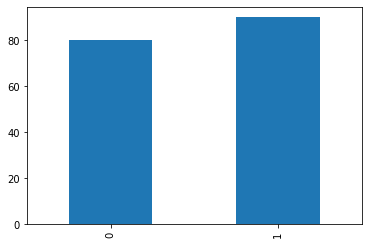

In [24]:
user['Active'].plot(kind='bar')

<AxesSubplot:>

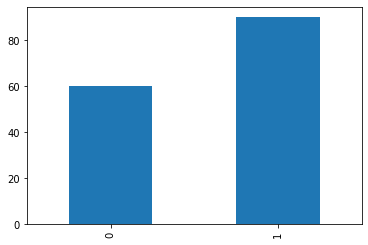

In [25]:
user['Passive'].plot(kind='bar')